# House Price - Linear Regression

## Parte 02 - ETL

#### > Importação das Bibliotecas

Download da Biblioteca **Missingno**

In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

#### > Carregamento do Dataset

Carregamento do dataset **'kc_house_data.csv'**. O comando 'set_option' permite que a tabela seja apresentada sem simplicação 

In [3]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('max_columns', None)

#### > Verificação do Dataset

Verificação do tamanho do Dataset

In [4]:
df.shape

(21613, 21)

Features do modelo

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Verificando as informações do Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

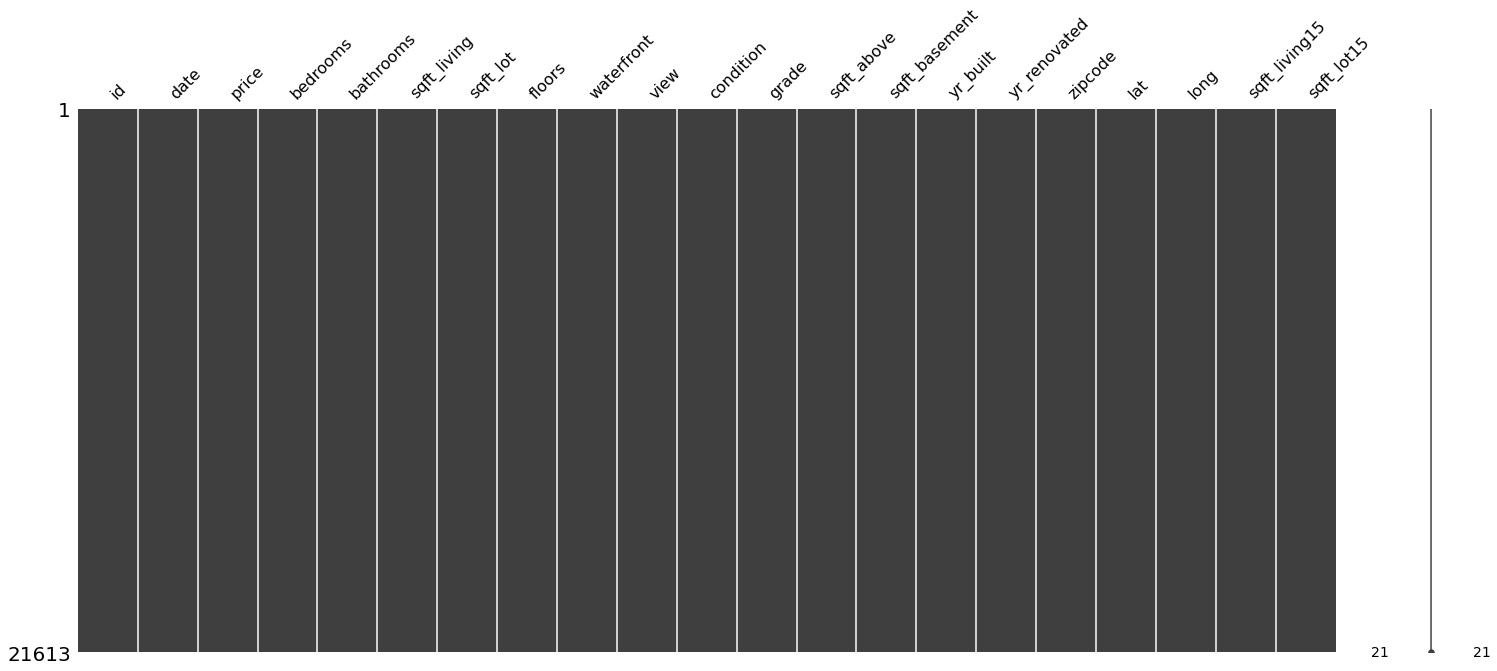

In [7]:
msno.matrix(df)

Como podemos observar, não possuimos variaveis com valores nulos, com isso não será preciso realizar correções desse tipo no dataset

#### > Correção do Dataset

Verificando a existencia de dados duplicados na coluna **'ID'**

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

Como podemos avaliar, o **'ID'** não apresenta valores unicos para o df, com isso, não podemos usar ele como index. Assim sendo, decidi retirar essa feature do nosso dataset

In [9]:
df.drop(['id'],axis=1,inplace=True)

In [10]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df['date'].str.split('T')

0        [20141013, 000000]
1        [20141209, 000000]
2        [20150225, 000000]
3        [20141209, 000000]
4        [20150218, 000000]
                ...        
21608    [20140521, 000000]
21609    [20150223, 000000]
21610    [20140623, 000000]
21611    [20150116, 000000]
21612    [20141015, 000000]
Name: date, Length: 21613, dtype: object

In [12]:
df['date']= df['date'].str.split('T').str[0]

In [13]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

Nessa primeira etapa, foi corrigido as dados da coluna **'date'**, onde a mesma apresentava muitos caracteres que não iriam auxiliar no nosso projeto

In [15]:
df['year'], df['month'], df['day'] = df['date'].dt.year, df['date'].dt.month, df['date'].dt.day

In [16]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25


Separamos a coluna 'date' em 'year','month' e 'day'. Assim, conseguimos modificar a coluna de ano de construção, colocando a idade do imóvel

In [17]:
df['yr_built']=df['year']-df['yr_built']

In [18]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,59,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,63,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,98028,47.7379,-122.233,2720,8062,2015,2,25


Como modificamos a coluna, devemos renomea-la 

In [19]:
df.rename(columns={'yr_built': "age_built"},inplace=True)

In [20]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,59,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,63,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,98028,47.7379,-122.233,2720,8062,2015,2,25


In [21]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'age_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [22]:
df = df[['date', 'day','month', 'year','price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'age_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

Agora colocamos o dataset na order que achamos mais apropriada 

In [23]:
df.head(3)

,date,day,month,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,13,10,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,59,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,9,12,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,63,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,25,2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,98028,47.7379,-122.233,2720,8062


In [24]:
df.nunique()

date              372
day                31
month              12
year                2
price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
age_built         117
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   day            21613 non-null  int64         
 2   month          21613 non-null  int64         
 3   year           21613 non-null  int64         
 4   price          21613 non-null  float64       
 5   bedrooms       21613 non-null  int64         
 6   bathrooms      21613 non-null  float64       
 7   sqft_living    21613 non-null  int64         
 8   sqft_lot       21613 non-null  int64         
 9   floors         21613 non-null  float64       
 10  waterfront     21613 non-null  int64         
 11  view           21613 non-null  int64         
 12  condition      21613 non-null  int64         
 13  grade          21613 non-null  int64         
 14  sqft_above     21613 non-null  int64         
 15  sqft_basement  2161

Como vemos anteriormente, a coluna 'waterfront' possui apenas duas variaveis, podendo assim ser modificada para um tipo categorica

In [26]:
df['waterfront']=df['waterfront'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   day            21613 non-null  int64         
 2   month          21613 non-null  int64         
 3   year           21613 non-null  int64         
 4   price          21613 non-null  float64       
 5   bedrooms       21613 non-null  int64         
 6   bathrooms      21613 non-null  float64       
 7   sqft_living    21613 non-null  int64         
 8   sqft_lot       21613 non-null  int64         
 9   floors         21613 non-null  float64       
 10  waterfront     21613 non-null  category      
 11  view           21613 non-null  int64         
 12  condition      21613 non-null  int64         
 13  grade          21613 non-null  int64         
 14  sqft_above     21613 non-null  int64         
 15  sqft_basement  2161

<AxesSubplot:>

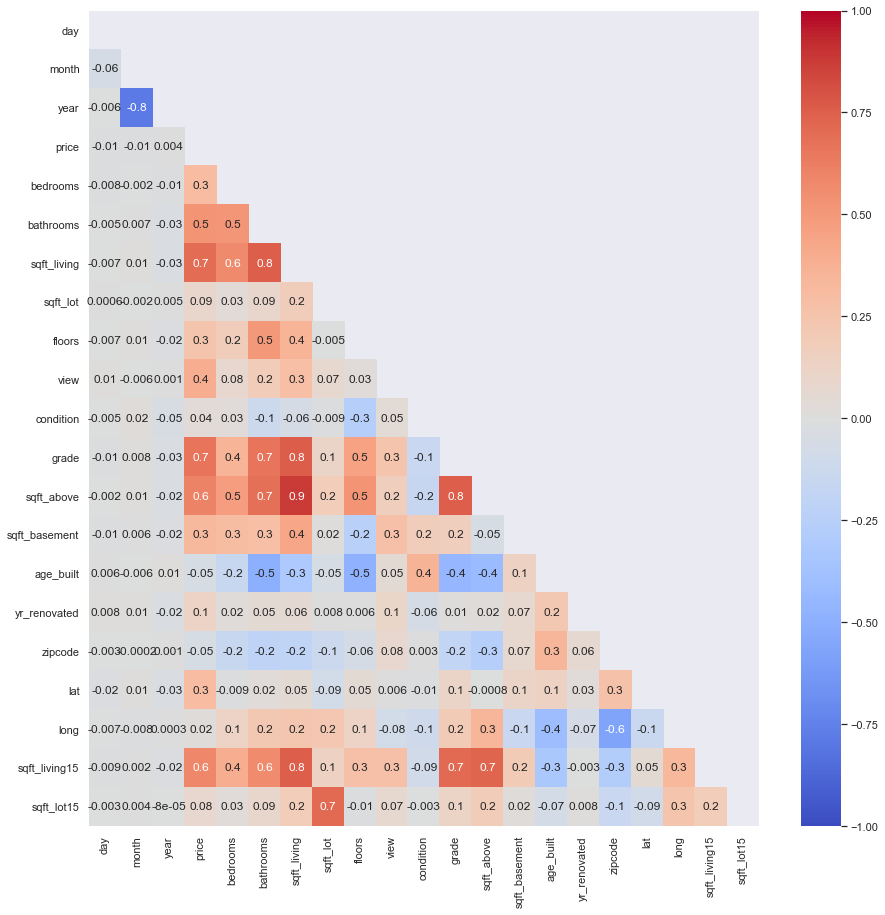

In [28]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(),annot=True, fmt='.1g',vmin=-1,vmax=1,center=0,cmap='coolwarm', mask=mask)

#### > Exportação do Dataset

Exportação, do dataset limpo, com o nome **'house_data.csv'**

In [29]:
df.to_csv('house_data.csv',index=False)

In [30]:
'''
------------------- Parte ETL ------------------------- 

**id**                        0      - DELETADA 
**day**                       0      - Criada a partir da coluna **date**
**month**                     0      - Criada a partir da coluna **date**
**year**                      0      - Criada a partir da coluna **date**
**date**                      0      - Removido os caracteres a mais, e também alterada para tipo 'datetime'
**price**                     0      - Não Alterado
**bedrooms**                  0      - Não Alterado
**bathrooms**                 0      - Não Alterado
**sqft_living**               0      - Não Alterado
**sqft_lot**                  0      - Não Alterado
**floors**                    0      - Não Alterado
**waterfront**                0      - Alterado para tipo 'category'
**view**                      0      - Não Alterado
**condition**                 0      - Não Alterado
**grade**                     0      - Não Alterado
**sqft_above**                0      - Não Alterado
**sqft_basement**             0      - Não Alterado
**age_built**                 0      - Alterado nome, e realizado a subtração entre a coluna com a coluna **year**
**yr_renovated**              0      - Não Alterado
**zipcode**                   0      - Não Alterado
**lat**                       0      - Não Alterado
**long**                      0      - Não Alterado
**sqft_living15**             0      - Não Alterado
**sqft_lot15**                0      - Não Alterado
'''

"\n------------------- Parte ETL ------------------------- \n\n**id**                        0      - DELETADA \n**day**                       0      - Criada a partir da coluna **date**\n**month**                     0      - Criada a partir da coluna **date**\n**year**                      0      - Criada a partir da coluna **date**\n**date**                      0      - Removido os caracteres a mais, e também alterada para tipo 'datetime'\n**price**                     0      - Não Alterado\n**bedrooms**                  0      - Não Alterado\n**bathrooms**                 0      - Não Alterado\n**sqft_living**               0      - Não Alterado\n**sqft_lot**                  0      - Não Alterado\n**floors**                    0      - Não Alterado\n**waterfront**                0      - Alterado para tipo 'category'\n**view**                      0      - Não Alterado\n**condition**                 0      - Não Alterado\n**grade**                     0      - Não Alterado\n**sqf